In [3]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

2023-05-18 13:58:30.565333: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-18 13:58:30.568538: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 13:58:30.646468: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 13:58:30.648961: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 13:58:32.177672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
dt = 0.01; T = 8; t = np.arange(0,T+dt,dt)
beta = 8/3; sigma = 10; rho = 28
nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

def lorenz_deriv(x_y_z,t0,sigma=sigma,beta=beta,rho=rho):
    x, y, z = x_y_z
    return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]

x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t) for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]

In [5]:
net = keras.models.Sequential()
net.add(layers.Dense(10, input_dim=3, activation='sigmoid'))
net.add(layers.Dense(10, activation='relu'))
net.add(layers.Dense(3, activation='linear'))
net.compile(loss='mse', optimizer='adam')
History = net.fit(nn_input, nn_output, epochs=30)

Epoch 1/30
2500/2500 [==============================] - 6s 2ms/step - loss: 44.0766
Epoch 2/30
2500/2500 [==============================] - 6s 2ms/step - loss: 2.9623
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6795
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.2314
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1232
Epoch 6/30
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0857
Epoch 7/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0696
Epoch 8/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0577
Epoch 9/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0507
Epoch 10/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0459
Epoch 11/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0413
Epoch 12/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0376


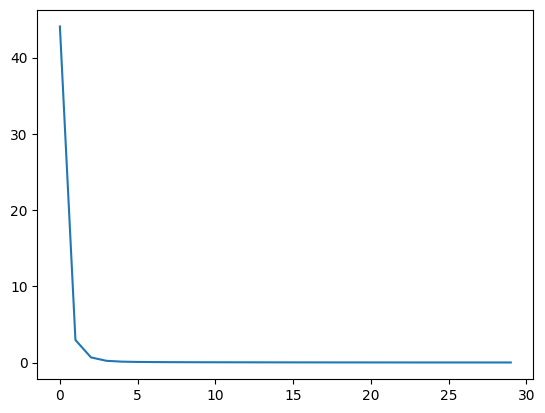

In [6]:
# plot loss history
plt.plot(History.history['loss'])

In [9]:
print(t[:-1].shape)

(800,)


In [11]:
# 2 trajetórias
num_traj = 2

ynn = np.zeros((num_traj, len(t), 3))
ynn[:, 0, :] = -15 + 30 * np.random.random((num_traj, 3))
for jj, tval in enumerate(t[:-1]):
    ynn[:, jj+1, :] = net.predict(ynn[:, jj, :], verbose=1)

1/1 [==============================] - 0s 23ms/step


In [16]:
# solve ODE, the two trajectories
y_t_1 = integrate.odeint(lorenz_deriv, ynn[0, 0, :], t)
y_t_2 = integrate.odeint(lorenz_deriv, ynn[1, 0, :], t)
y_t_1

array([[  1.9983245 , -13.3796729 ,   3.69920355],
       [  0.55898396, -12.93989963,   3.43812185],
       [ -0.71797252, -12.83377926,   3.35944854],
       ...,
       [  5.93401441,   6.26519711,  23.43509398],
       [  5.97583677,   6.48058112,  23.19278325],
       [  6.03485724,   6.70998167,  22.97320713]])

In [18]:
y_t_2

array([[-5.07155238, 14.38154274, 11.19056908],
       [-3.26390555, 13.52768868, 10.32557638],
       [-1.69592162, 12.95334016,  9.73248165],
       ...,
       [ 2.22850141,  3.70318843, 17.50310712],
       [ 2.37872388,  3.91128554, 17.12905876],
       [ 2.53556389,  4.14251074, 16.77594309]])

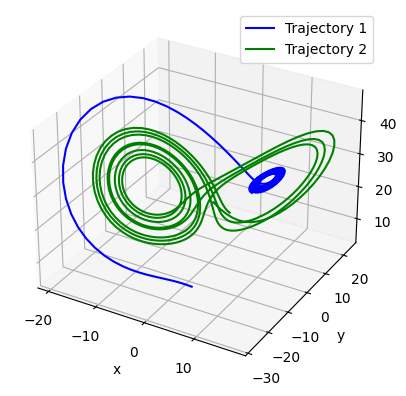

In [21]:
# plot y_t_1 and y_t_2 (blue and green)
# 3d
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(y_t_1[:, 0], y_t_1[:, 1], y_t_1[:, 2], 'b')
ax.plot(y_t_2[:, 0], y_t_2[:, 1], y_t_2[:, 2], 'g')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# blue label = trajectory 1
# green label = trajectory 2
plt.legend(['Trajectory 1', 'Trajectory 2'])
plt.show()